## Анализ данных сервиса по заказу еды онлайн

Набор данных представляет собой информацию о клиентах сервиса по онлайн заказу еды. Необходимо проанализировать данные клиентов,
оказываемое влияние различных параметров на формирование заказа. Установить связь между демографическими данными, отзывами клиентов, и местоположение и формированием заказ. 

**Входные данные представлены следующими категориями:**

* Age - возраст клиента
* Gender - пол
* Marital Status - семейное положение
* Occupation - статус занятости
* Monthly Income - ежемесячный доход клиента
* Educational Qualifications - образование
* Family size - размер семьи клиента
* latitude - широта местоположения клиента
* longitude - долгота местоположения клиента
* Pin code - почтовый индекс
* Output - текущий статус заказа
* Feedback - отзыв клиента

**Анализ данных будет проходить в следующей последовательности:**

1. Обзор данных
2. Очистка и предварительная обработка данных
3. Анализ данных
4. Выводы

### Обзор данных

In [1]:
#Загрузка неоходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Загрузка файла с данными
data = pd.read_csv('onlinefoods.csv')

In [3]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [4]:
data.shape

(388, 13)

Набор данных представлен 13 столбцами и 388 строками

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


Имеются четыре категории с числовыми данными: возраст, размер семьи, и координаты местоположения

Рассмотрим данные, встречающиеся в столбцах:

In [6]:
for elem in data.columns:
    print(elem)
    print(data[elem].unique())
    print('---------------------------------------')
    print(' ')

Age
[20 24 22 27 23 21 28 25 32 30 31 26 18 19 33 29]
---------------------------------------
 
Gender
['Female' 'Male']
---------------------------------------
 
Marital Status
['Single' 'Married' 'Prefer not to say']
---------------------------------------
 
Occupation
['Student' 'Employee' 'Self Employeed' 'House wife']
---------------------------------------
 
Monthly Income
['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']
---------------------------------------
 
Educational Qualifications
['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']
---------------------------------------
 
Family size
[4 3 6 2 5 1]
---------------------------------------
 
latitude
[12.9766 12.977  12.9551 12.9473 12.985  12.9299 12.9828 12.9854 12.8988
 12.9438 12.8893 12.9783 12.982  13.0298 12.9983 12.9925 12.9306 12.9353
 12.9155 13.0019 12.9698 12.9261 12.9119 12.9662 12.9565 13.0206 12.9635
 13.0067 12.8845 13.0158 12.9343 13.0012 12.9442 13.0487 12.9889 12.9

Данные по категориям распределены следующим образом:
* Возраст клиента: количество полных лет
* Пол: мужской и женский
* Семейный статус: одинокий, семейный и  предпочёл не сообщать
* Тип занятости: студент, сотрудник но найму, самозанятый, домохозяйка
* Месячный доход: нет дохода, доход до 10 000 включительно, от 10 000 до 25 000 включительно, от 25 000 до 50 000
* Данные об образовании: аспирантура, выпускник, доктор наук, без образования, школьник
* Количество членов семьи: 1, 2, 3, 4, 5, 6
* Координаты местоположения клиента
* Почтовый индекс
* Статус заказа: выполнен, не выполнен
* Отзыв клиента: положительный, отрицательный
* Последний столбец не несет в себе значимой для анализа данные

In [7]:
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


На первый взгляд в таблице отсутствуют нулевые значения. Имеется столбец, не несущий в себе полезной информации. Более подробно проверим на наличие пустых значений и не нужных столбцов данных в разделе очистки и предобработке данных.

### Очистка и предварительная обработка данных

In [8]:
# проверяем на нулевые значения
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

В данных отсутствуют нулевые значения.

In [9]:
# проверяем на явные дубликаты
data.duplicated().sum()

103

In [10]:
duplicate_data = data[data.duplicated()]

In [11]:
duplicate_data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
43,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
48,23,Female,Single,Student,No Income,Graduate,3,12.9820,77.6256,560008,Yes,Negative,Yes
49,22,Female,Single,Student,10001 to 25000,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
52,24,Male,Single,Student,No Income,Post Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
60,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes


In [12]:
# удаляем дубликаты данных
data = data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

Координаты не будем учитывать. Для формирования местоположения клиентов будем рассматривать почтовый индекс. Нам достаточно определиться с районом проживания, необходимость в данном случае в точных координатах местоположения отсутствует

Удалим столбцы с координатами, а так же не нужный столбец Unnamed

In [14]:
data = data.drop(['latitude', 'longitude', 'Unnamed: 12'], axis = 1)

Заменим значения с английского языка на русский

In [15]:
data = data.replace(['Female', 'Male', 'Single', 'Married', 'Prefer not to say', 'Student', 'Employee', 'Self Employeed', 'House wife',
                    'No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
 '25001 to 50000', 'Post Graduate', 'Graduate', 'Ph.D', 'Uneducated', 'School', 'Yes', 'No', 'Positive', 'Negative '], 
                   ['Женский', 'Мужской', 'Одинокий', 'Семейный', 'Не указан', 'Студент', 'Служащий', 'Самозанятый', 'Домохозяйка', 
                   'Не известный', '10000', '60000', '20000', '40000', 'Аспирантура', 'Выпускник', 'Доктор наук', 'Без образования', 
                   'Школьник', 'Выполнен', 'Не выполнен', 'Положительный', 'Отрицательный'])

In [16]:
data.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Pin code,Output,Feedback
212,21,Мужской,Одинокий,Студент,Не известный,Выпускник,2,560046,Не выполнен,Отрицательный
17,23,Женский,Одинокий,Студент,Не известный,Выпускник,3,560008,Выполнен,Отрицательный
140,23,Мужской,Одинокий,Студент,Не известный,Аспирантура,3,560064,Не выполнен,Положительный
50,23,Женский,Одинокий,Студент,Не известный,Выпускник,5,560043,Выполнен,Положительный
293,25,Женский,Семейный,Служащий,60000,Выпускник,1,560009,Не выполнен,Отрицательный


## Анализ данных

**В первую очередь рассмотрим количественные значения по всем демографическим данным, данным местоположения, отзывам и статусе заказов**

In [17]:
for item in data.columns:
    print(data[item].value_counts())
    print('------------')

Age
23    47
25    41
22    40
24    37
26    27
21    18
27    16
28    12
32    12
30     8
20     7
31     7
29     7
19     4
18     1
33     1
Name: count, dtype: int64
------------
Gender
Мужской    164
Женский    121
Name: count, dtype: int64
------------
Marital Status
Одинокий     189
Семейный      87
Не указан      9
Name: count, dtype: int64
------------
Occupation
Студент        144
Служащий        94
Самозанятый     38
Домохозяйка      9
Name: count, dtype: int64
------------
Monthly Income
Не известный    131
40000            52
60000            47
20000            36
10000            19
Name: count, dtype: int64
------------
Educational Qualifications
Выпускник          126
Аспирантура        125
Доктор наук         21
Школьник            11
Без образования      2
Name: count, dtype: int64
------------
Family size
3    87
2    75
4    45
5    37
6    23
1    18
Name: count, dtype: int64
------------
Pin code
560009    22
560038    11
560010     8
560066     8
560029     

Наглядное представление количественных значений по данным в виде графиков

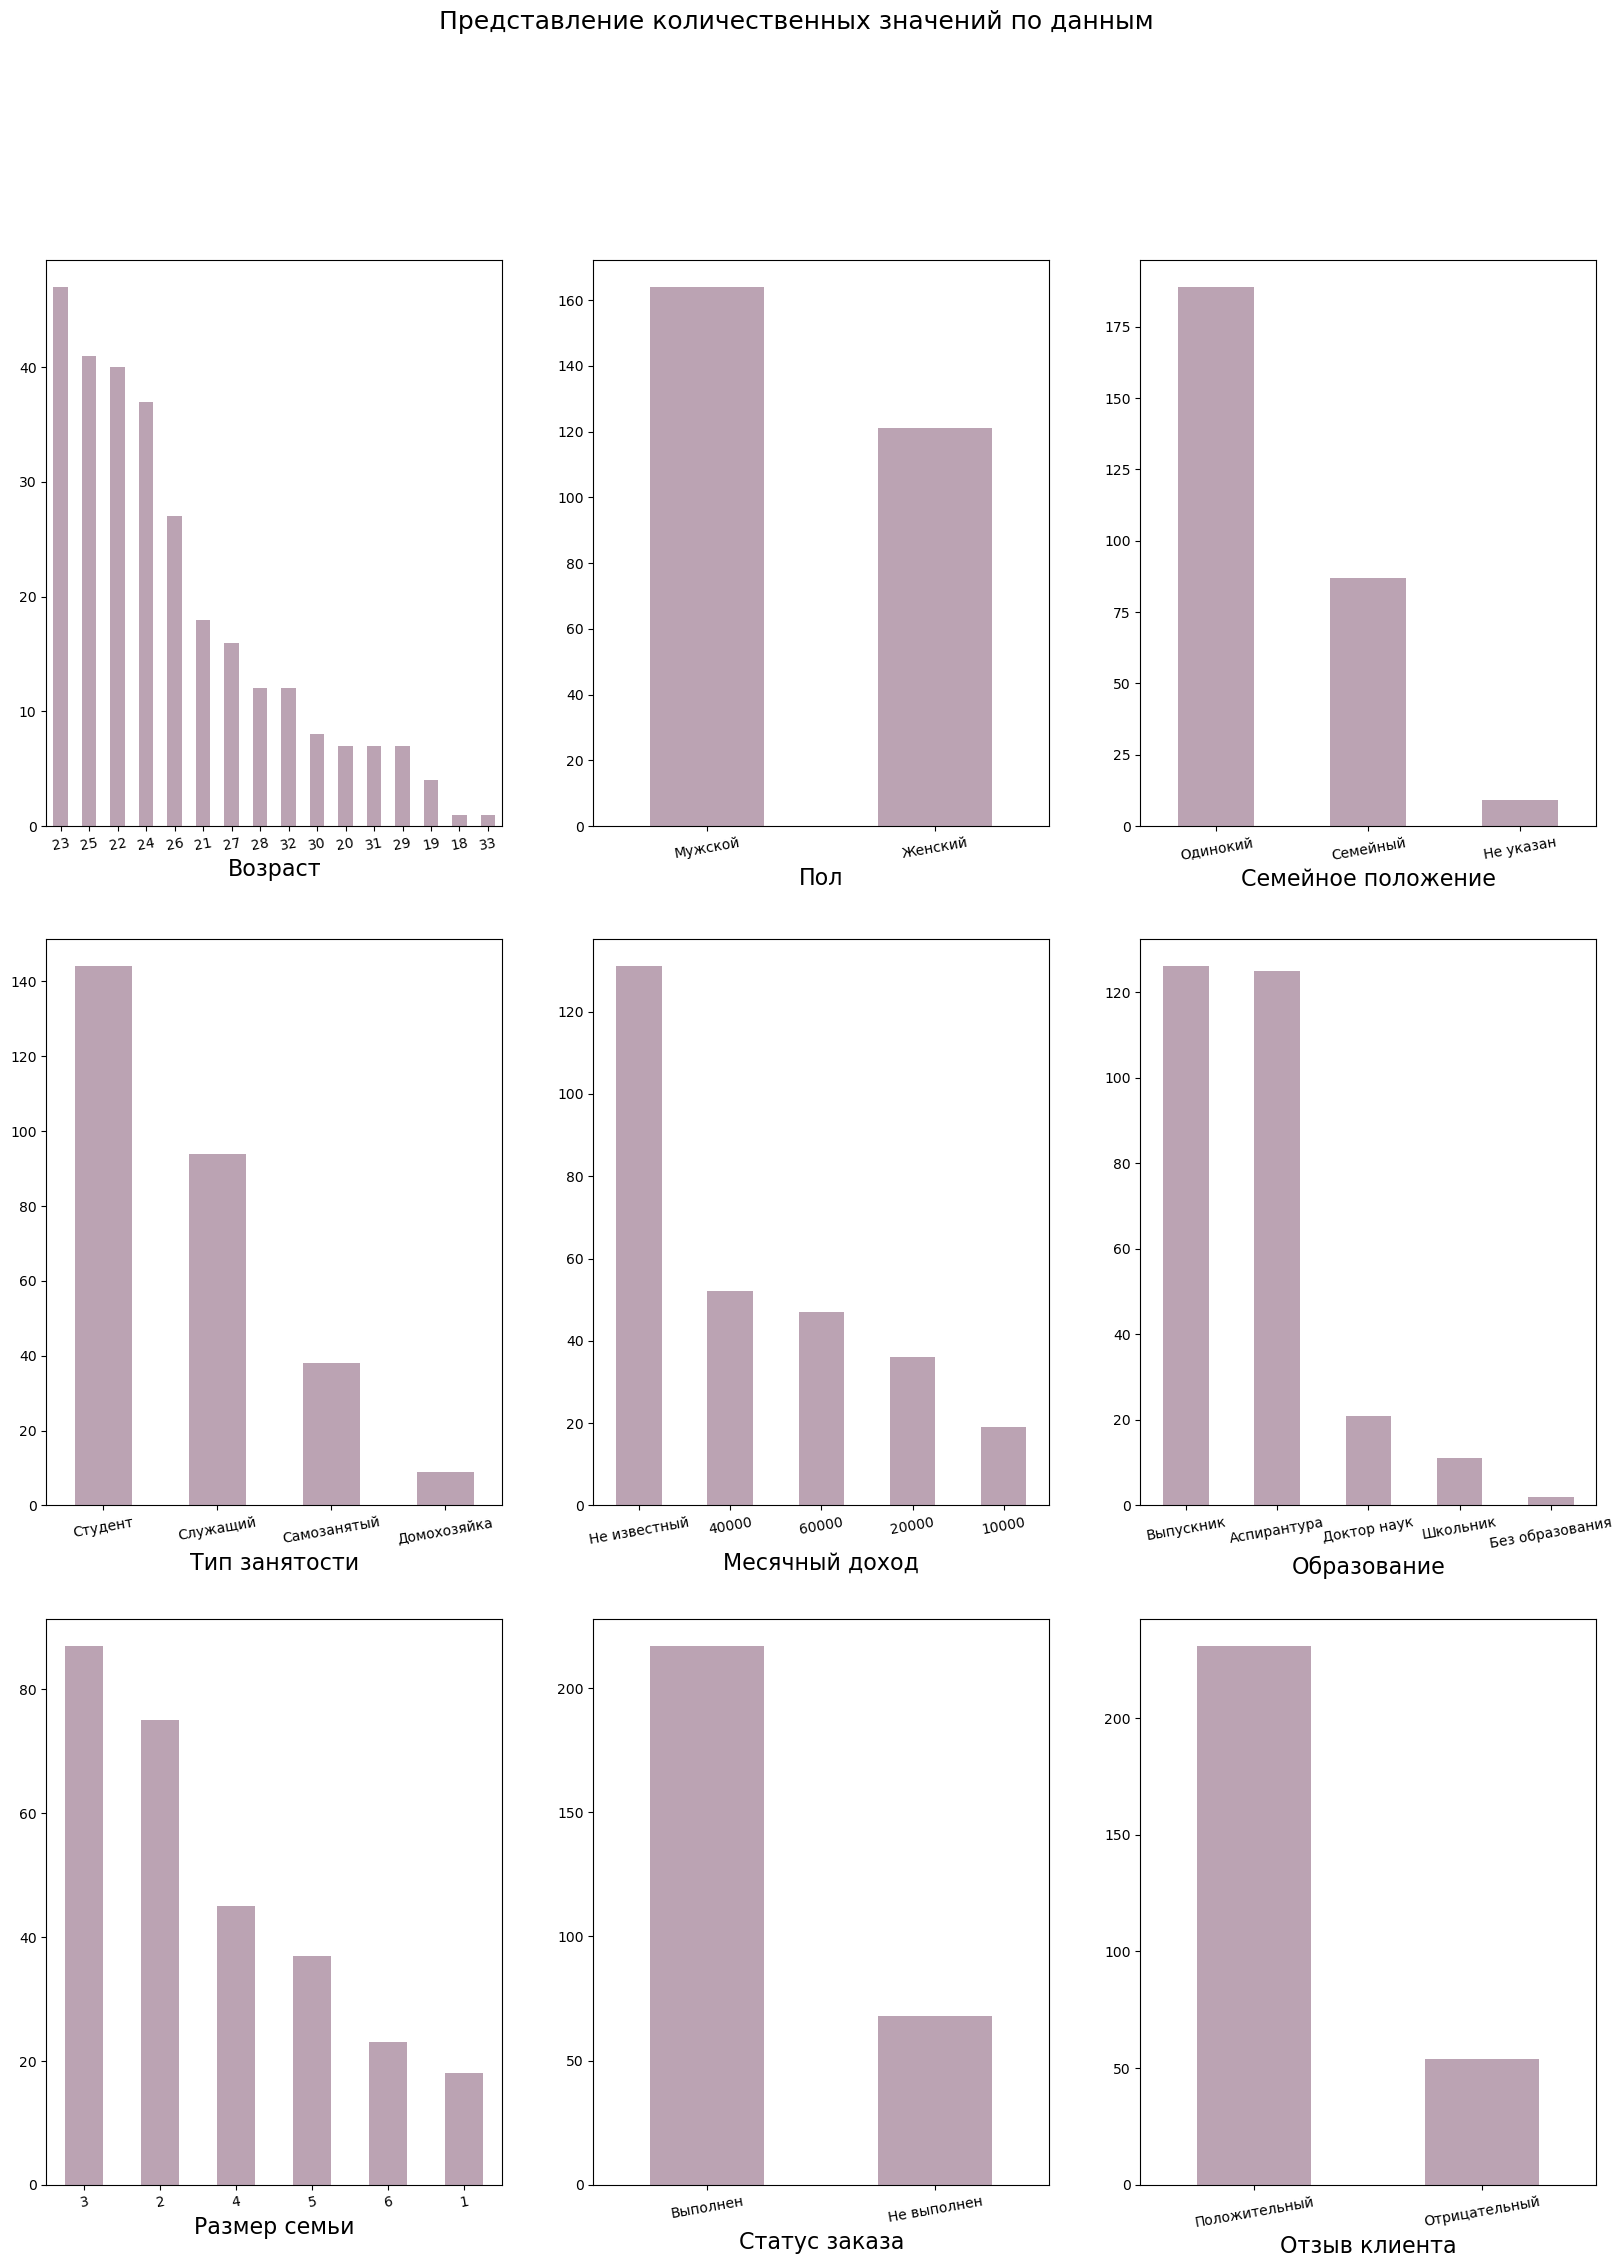

In [18]:
client_info_list = list(data.columns)
client_info_list.remove('Pin code')
label_item = ['Возраст', 'Пол', 'Семейное положение', 'Тип занятости', 'Месячный доход', 'Образование', 
              'Размер семьи', 'Статус заказа', 'Отзыв клиента']
plt.figure(figsize = (20, 25))
plt.suptitle('Представление количественных значений по данным', fontsize = 18)
plot_num = 331
for i in range(len(client_info_list)):
    plt.subplot(plot_num)
    data[client_info_list[i]].value_counts().plot(kind = 'bar', color = '#9E7C93', alpha = 0.7)
    plt.xlabel(label_item[i], fontsize = 16)
    plt.xticks(rotation = 10)
    plot_num += 1
plt.show()

Из графиков видно, что количественное распределение выглядит следующим образом:
1. Наибольшее число клиентов в диапазоне от 21 до 26 лет
2. Больше заказов делают мужчины, чем женщины
3. Больше половины заказов от одиноких клиентов
4. Среди типов занятости наибольшее количество заказов у студентов
5. Клиенты со средним доходом имеют большее количество заказов
6. Люди с образованиием и учащиеся в высших заведениях- основные клиенты
7. Среди семейных - наибольшее число заказов у семей с 2-3 детьми
8. Порядка 2/3 заказов имеют статус выполнен
9. Больше 2/3 заказов имеют положительные отзывы

**Рассмотрим количественное распределение статусов заказов в зависимости от возраста клиента**

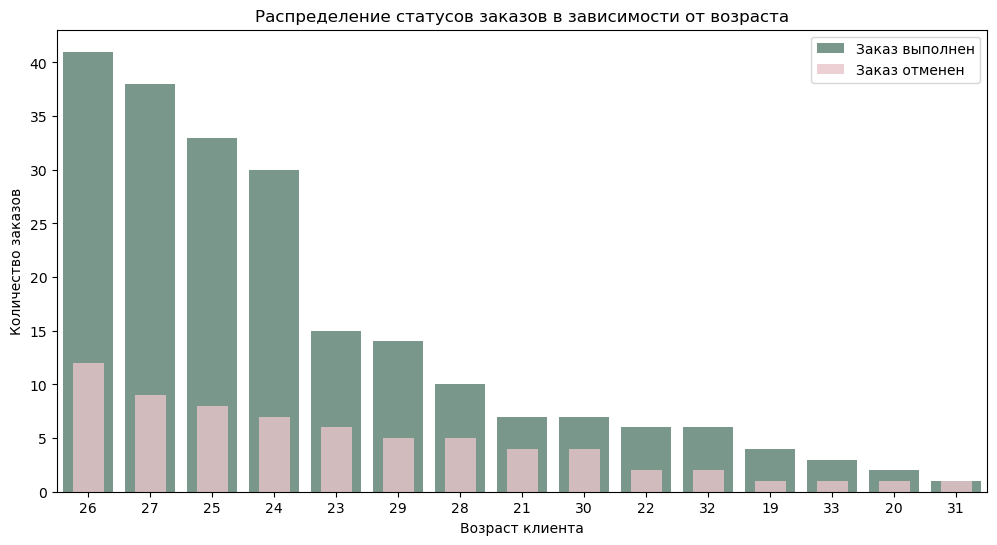

In [19]:
plt.figure(figsize = (12, 6))
data['Age'].loc[data['Output'] == 'Выполнен'].value_counts().plot(kind = 'bar', color = '#406D5A', width = 0.8, 
                                                                  alpha = 0.7, label = 'Заказ выполнен')
data['Age'].loc[data['Output'] == 'Не выполнен'].value_counts().plot(kind = 'bar', color = '#E9C5C9', 
                                                                     alpha = 0.8, label = 'Заказ отменен')
plt.title('Распределение статусов заказов в зависимости от возраста')
plt.xlabel('Возраст клиента')
plt.ylabel('Количество заказов')
plt.xticks(rotation = 0)
plt.legend()
plt.show()

Преобладание выполненных заказов в группе 23 - 26 лет. В 21, 30, 31 - преобладает статус "не выполнен".

**Рассмотрим количество заказов в зависимости от местоположения**

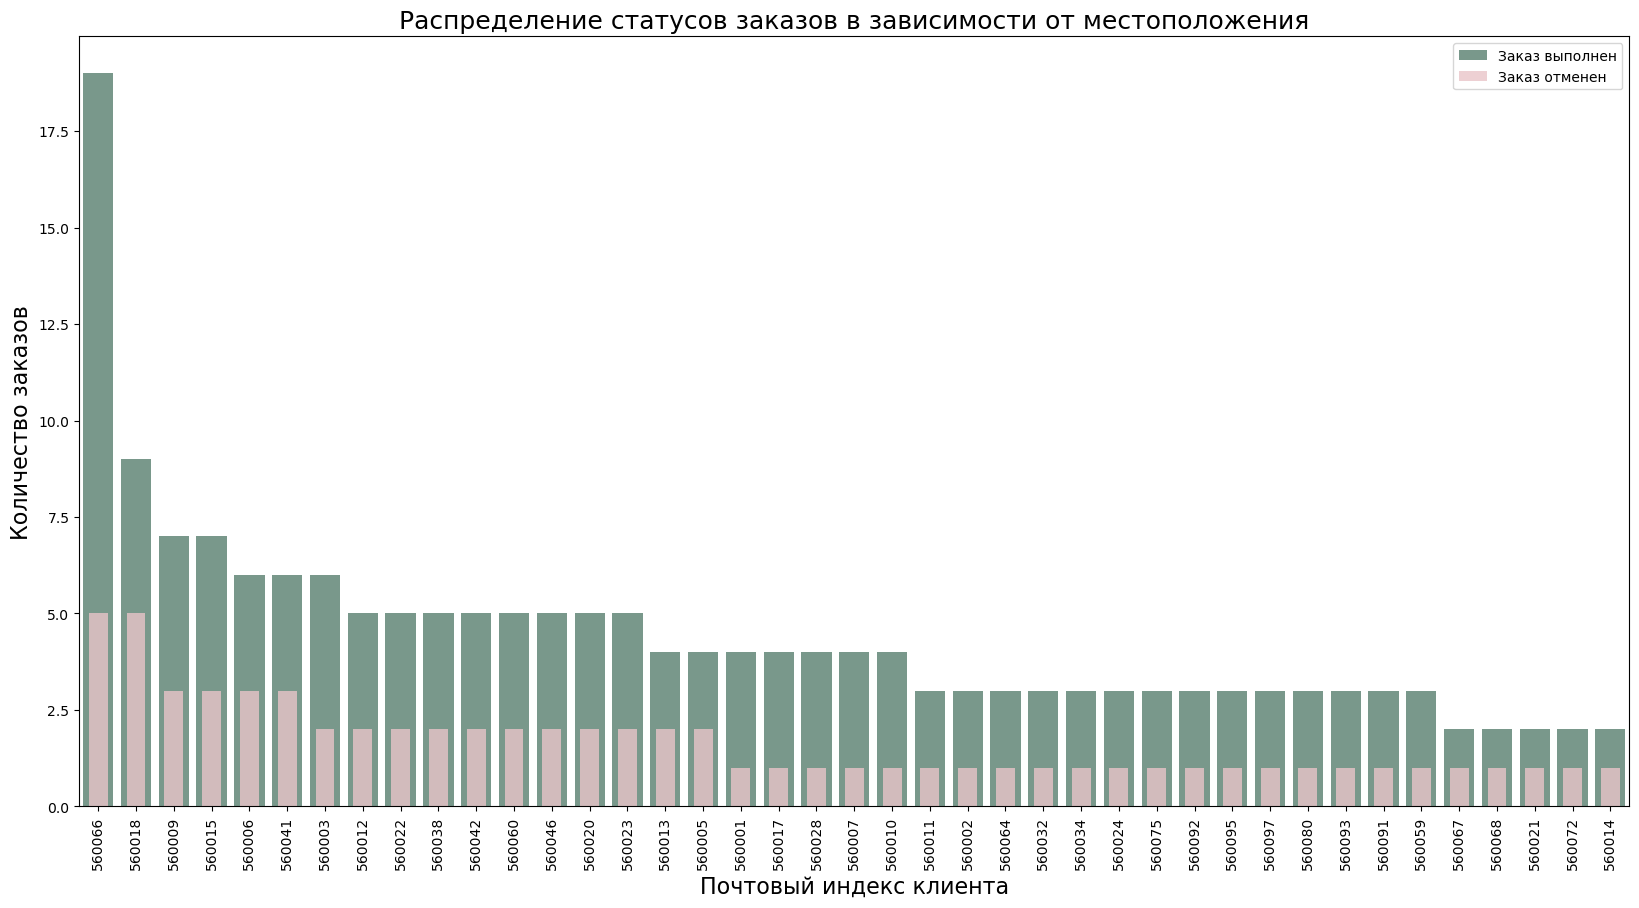

In [20]:
plt.figure(figsize = (20, 10))
data['Pin code'].loc[data['Output'] == 'Выполнен'].value_counts().plot(kind = 'bar', color = '#406D5A', width = 0.8, 
                                                                  alpha = 0.7, label = 'Заказ выполнен')
data['Pin code'].loc[data['Output'] == 'Не выполнен'].value_counts().plot(kind = 'bar', color = '#E9C5C9', 
                                                                     alpha = 0.8, label = 'Заказ отменен')
plt.title('Распределение статусов заказов в зависимости от местоположения', fontsize = 18)
plt.xlabel('Почтовый индекс клиента', fontsize = 16)
plt.ylabel('Количество заказов', fontsize = 16)
plt.legend()
plt.show()

Максимальное количество заказов по почтовому индексу 560066, здесь же максимальное соотношение выполненых заказов к отменённым

**Рассмотрим количественное распределение отзывов в зависимости от возраста**

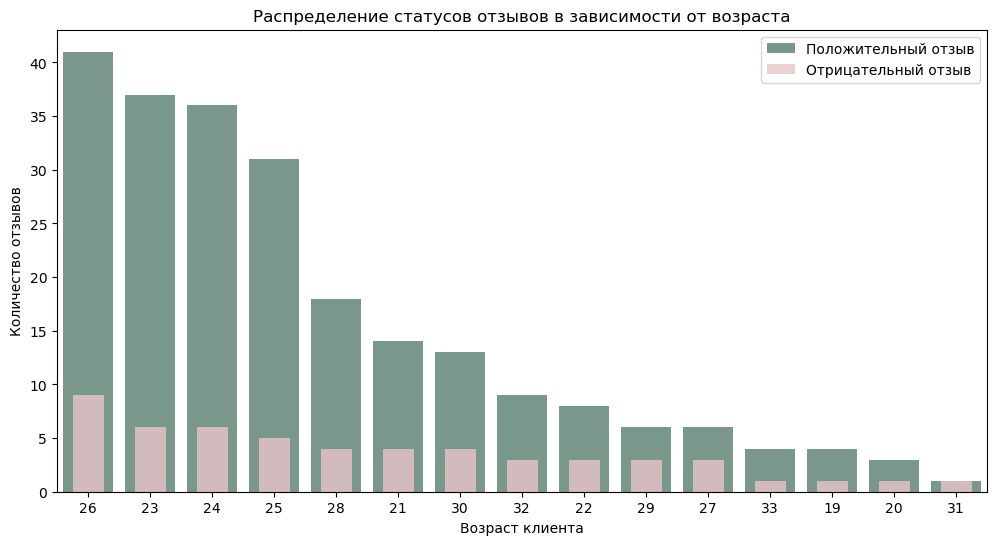

In [24]:
plt.figure(figsize = (12, 6))
plt.title('Распределение статусов отзывов в зависимости от возраста')
data['Age'].loc[data['Feedback'] == 'Положительный'].value_counts().plot(kind = 'bar', color = '#406D5A', width = 0.8,
                                                                        alpha = 0.7, label = 'Положительный отзыв')
data['Age'].loc[data['Feedback'] == 'Отрицательный'].value_counts().plot(kind = 'bar', color = '#E9C5C9',
                                                                        alpha = 0.8, label = 'Отрицательный отзыв')
plt.xlabel('Возраст клиента')
plt.ylabel('Количество отзывов')
plt.xticks(rotation = 0)
plt.legend()
plt.show()

За исключением возрастной группы 27, 29, 31 преобладают положительные отзывы. Особенно в группе 21 - 26 лет

Группа клиентов в возрасте от 21 до 26 лет включительно самая активная, как в плане количества заказов и отзывов, так и в плане
выполнения заказа и положительных отзывов.

**Рассмотрим влияние остальных данных об клиентах на статус выполнения заказов и формирование положительных
отзывов**

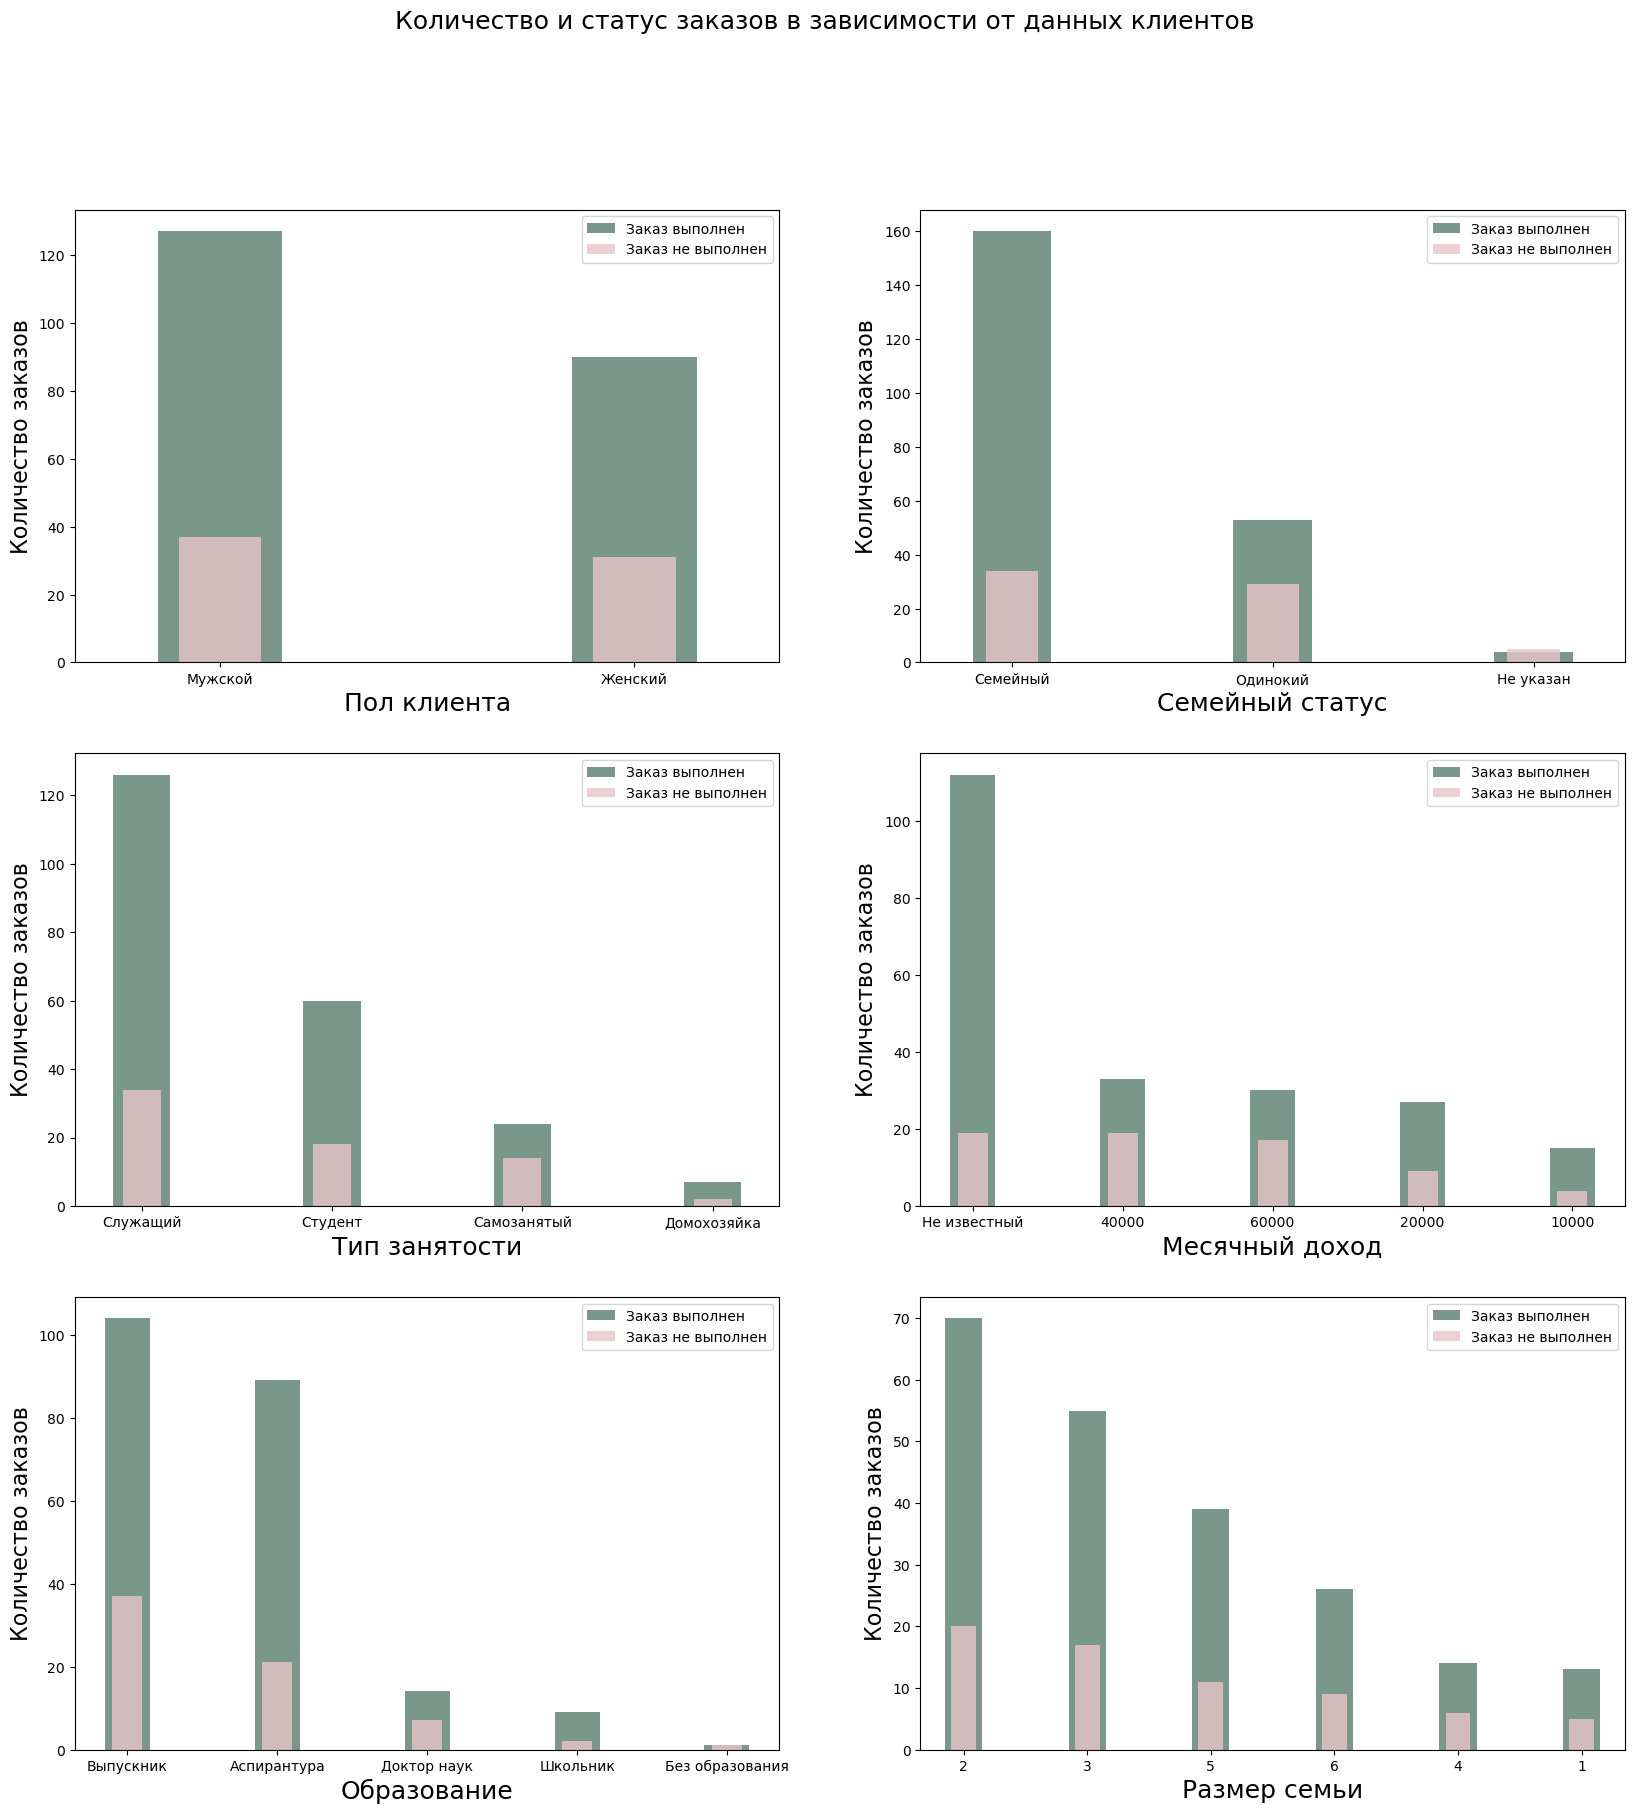

In [22]:
client_info = list(data.columns)[1:7]
label_list = ['Пол клиента', 'Семейный статус', 'Тип занятости', 'Месячный доход', 'Образование', 'Размер семьи']
plt.figure(figsize = (20, 20))
plt.suptitle('Количество и статус заказов в зависимости от данных клиентов', fontsize = 18)
num_plot = 321
for i in range(len(client_info)):
    plt.subplot(num_plot)
    data[client_info[i]].loc[data['Output'] == 'Выполнен'].value_counts().plot(kind = 'bar', color = '#406D5A', width = 0.3, 
                                                                    alpha = 0.7, label = 'Заказ выполнен')
    data[client_info[i]].loc[data['Output'] == 'Не выполнен'].value_counts().plot(kind = 'bar', color = '#E9C5C9', width = 0.2, 
                                                                       alpha = 0.8, label = 'Заказ не выполнен')
    plt.xlabel(label_list[i], fontsize = 18)
    plt.ylabel('Количество заказов', fontsize = 16)
    plt.xticks(rotation = 0)
    plt.legend()
    num_plot +=1
plt.show()

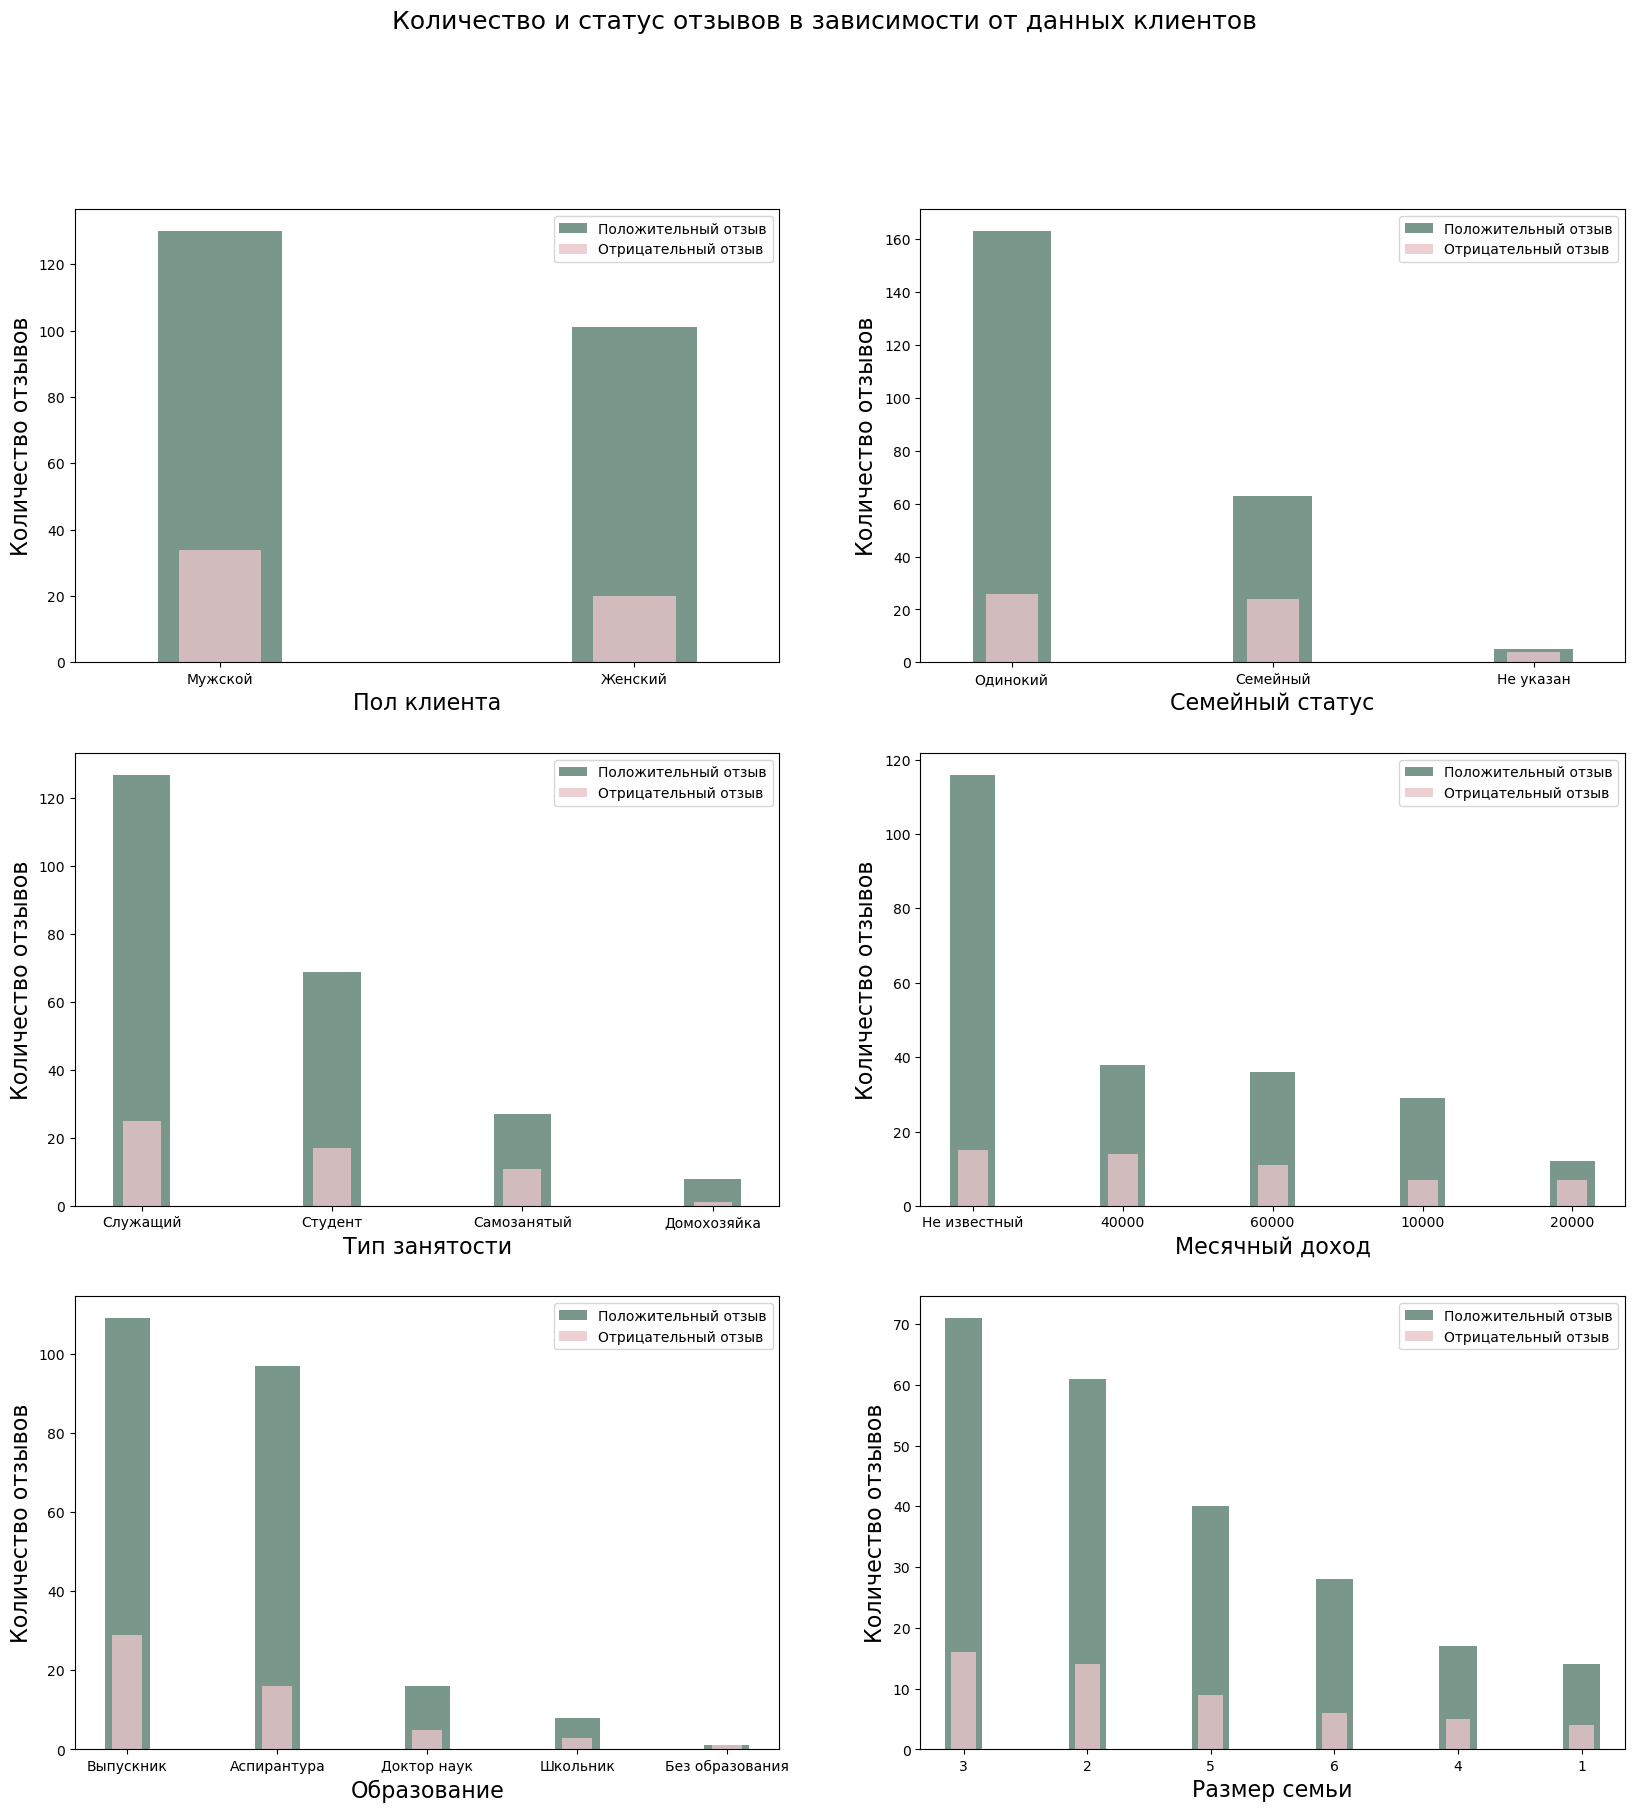

In [25]:
client_info = list(data.columns)[1:7]
label_list = ['Пол клиента', 'Семейный статус', 'Тип занятости', 'Месячный доход', 'Образование', 'Размер семьи']
plt.figure(figsize = (20, 20))
plt.suptitle('Количество и статус отзывов в зависимости от данных клиентов', fontsize = 18)
num_plot = 321
for i in range(len(client_info)):
    plt.subplot(num_plot)
    data[client_info[i]].loc[data['Feedback'] == 'Положительный'].value_counts().plot(kind = 'bar', color = '#406D5A', width = 0.3, 
                                                                     alpha = 0.7, label = 'Положительный отзыв')
    data[client_info[i]].loc[data['Feedback'] == 'Отрицательный'].value_counts().plot(kind = 'bar', color = '#E9C5C9', width = 0.2, 
                                                                       alpha = 0.8, label = 'Отрицательный отзыв')
    plt.xlabel(label_list[i], fontsize = 16)
    plt.ylabel('Количество отзывов', fontsize = 16)
    plt.xticks(rotation = 0)
    plt.legend()
    num_plot +=1
plt.show()

Анализ графиков показывает следующие зависимости:
1. По количеству заказов:
    1. Мужчины заказывают чаще женщин
     2. Семейные заказывают чаще одиноких
     3. По типу занятости: на первом месте служащие, на втором - студенты. Меньше всего заказов от домохозяек.
     4. По месячному доходу: больше всего заказов у группы клиентов не указавших доход. Остальные группы примерно на одном уровне
     5. Выпусники и студенты основная группа клиентов
     6. Наибольшее количество заказов у семейных с количество членов семьи 2 - 3 человека, следом группа - 5- 6 человек
2. По количеству отзывов:
     1. Различия от количества заказов только в семейном статусе: одинокие оставляют большее количество отзывов в отличии от семейных.

## Выводы

Портрет основного заказчика онлайн доставки еды:

1. Мужчина либо женщина(чаще мужчины), с законченным образованием, с постоянной работой, семейные: либо без детей либо с одним ребенком, а так же многодетные: 3 и более детей.
2. На втором месте студенты учебных заведений.

Самая молочисленная группа: школьники и домохозяйки

Наибольшее количество заказов по почтовому индексу 560066, здесь же наибольшее количество выполненых заказов.


Больше всего отзывы оставляют одинокие клиенты. Количество положительных отзывов превышает негативные

